## CISC 614 - Assignment 10
#### Queuing Model: Tire replacement shop
#### Roman Moser 187700

#### INTRODUCTION
The following report shows queing model simulation for the case of a tire replacement shop. Cars arrivae with a certain frequency (random, uniformly distributed) at a tire replacement shop. Depending on how many cars are in the que and how long it takes the crew to change tires, the cars' time at the shop varies. We investigate how the average and maximum waiting and processing times and the percentage of idle times change with a change in the parameters of arrival times, processing times and how the sahpe of the distributions over multiple simualtions changes with an increasing number of cars.

#### METHODS
#### 1. Manual calculations vs simulation results
Assume the following scanario:
 - 3 vehicles
 - min arrival time = max arrival time = 5min
 - min processing time = max processing time = 10min

#### Vehicle 1:
wating time: 0 min (no vehicle in front)
idle time: 0 min (time starts to count when first vehicle arrives)
time at shop: 10 min (processing time)

#### Vehicle 2:
wating time: 10 - 5 = 5 min (processing time of first vehicle - arrival time of second vehicle)
idle time: 0 min (since 2nd vehicle has to wait)
time at shop: 5 + 10 = 15 min (waiting time + processing time)

#### Vehicle 3:
wating time: 15 - 5 = 10 min (time second vehicle spends at shop - arrival time of third vehicle)
idle time: 0 min (since 3rd vehicle has to wait)
time at shop: 10 + 10 = 20 min (waiting time + processing time)

#### Results
 - average time at shop: (10 + 15 + 20) / 3 = 15 min; max time at shop: 20 min
 - average waiting time: (0 + 5 + 10) / 3 = 5 min; max waiting time: 10 min
 - percent idle: 0%

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Vehicle:
    def __init__(self, min_arrival_t=1, max_arrival_t=100, min_proc_t=20, max_proc_t=35):
        self.arrival_time = np.random.uniform(min_arrival_t, max_arrival_t)
        self.processing_time = np.random.uniform(min_proc_t, max_proc_t)

In [3]:
def simulation(vehicles):
    waiting_time = 0
    waiting_times, time_at_shop = [], []
    total_idle_time, total_processing_time = 0, 0
    for i, vehicle in enumerate(vehicles):
        waiting_time = max(0, waiting_time - vehicle.arrival_time)
        if i > 0:
            total_idle_time += max(0, vehicle.arrival_time - waiting_time)
        total_processing_time += vehicle.processing_time
        waiting_times.append(waiting_time)
        time_at_shop.append(waiting_time + vehicle.processing_time)
        waiting_time += vehicle.processing_time
    percent_idle = 100 * total_idle_time / (total_idle_time + total_processing_time)
    return time_at_shop, waiting_times, percent_idle

In [4]:
# simulation with same parameters as in manual calculation:
n_vehicles = 3
vehicles = []
for i in range(n_vehicles):
    vehicles.append(Vehicle(min_arrival_t=5, max_arrival_t=5, min_proc_t=10, max_proc_t=10))
time_at_shop, waiting_times, percent_idle = simulation(vehicles)
print(f'average time at shop: {np.mean(time_at_shop)}, max time at shop: {max(time_at_shop)}')
print(f'average waiting time: {np.mean(waiting_times)}, max waiting time: {max(waiting_times)}')
print(f'percent idle: {percent_idle}')

average time at shop: 15.0, max time at shop: 20.0
average waiting time: 5.0, max waiting time: 10.0
percent idle: 0.0


The results shown above are identical to the manually calculated ones and confirm that the simulation works correctly.

Now we define classes and functions to run multiple simulations with the same parameter set and obtain the resulting distributions of the relevant statistics (average time at shop, maximum time at shop, average waiting time, maximum waiting time and percent of idle time).

In [5]:
class Statistics:
    def __init__(self):
        self.n_runs = 0
        self.average_times_at_shop = []
        self.max_times_at_shop = []
        self.average_waiting_times = []
        self.max_waiting_times = []
        self.percent_idle_ = []

In [6]:
def run_multiple_simulations(n_simulations, n_vehicles, min_arrival_t, max_arrival_t, min_proc_t, max_proc_t):
    stats = Statistics()
    for i in range(n_simulations):
        stats.n_runs += 1
        vehicles = []
        for i in range(n_vehicles):
            vehicles.append(Vehicle(min_arrival_t, max_arrival_t, min_proc_t, max_proc_t))
        time_at_shop, waiting_times, percent_idle = simulation(vehicles)
        stats.average_times_at_shop.append(np.mean(time_at_shop))
        stats.max_times_at_shop.append(np.max(time_at_shop))
        stats.average_waiting_times.append(np.mean(waiting_times))
        stats.max_waiting_times.append(np.max(waiting_times))
        stats.percent_idle_.append(percent_idle)
    return stats

In [7]:
def plot_stats(stats, name_parameter_set):
    print(f'Results {stats.n_runs} runs: {name_parameter_set}')
    plt.figure(figsize=(12, 10))
    plt.subplot(3, 2, 1)
    plt.hist(stats.average_times_at_shop, bins=30)
    plt.title('average times at shop')
    plt.subplot(3, 2, 2)
    plt.hist(stats.max_times_at_shop, bins=30)
    plt.title('max times at shop')
    plt.subplot(3, 2, 3)
    plt.hist(stats.average_waiting_times, bins=30)
    plt.title('average waiting times')
    plt.subplot(3, 2, 4)
    plt.hist(stats.max_waiting_times, bins=30)
    plt.title('max waiting times')
    plt.subplot(3, 2, 5)
    plt.hist(stats.percent_idle_, bins=30)
    plt.title('percent idle per sim')
    plt.show()

For the first parameter set, we choose arrival times between and 60 minutes and processing times between 20 and 30 minutes (uniform distributions). We run 1000 simulations with 500 cars:

Results 1000 runs: Set 1 -- arrival times 1 - 60 min; processing times: 20 - 30 min


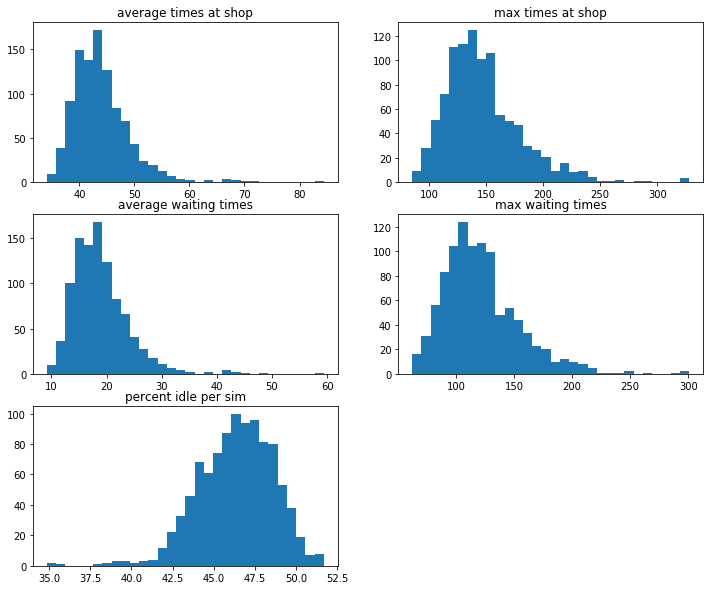

In [8]:
# Parameter set 1:
n_sim = 1000
n_cars = 500
min_arrival_t = 1 
max_arrival_t = 60 
min_proc_t = 20 
max_proc_t = 30
stats1 = run_multiple_simulations(n_sim, n_cars, min_arrival_t, max_arrival_t, min_proc_t, max_proc_t)
plot_stats(stats1, 'Set 1 -- arrival times 1 - 60 min; processing times: 20 - 30 min')

The plots above show that the average waiting time is mostly somewhere between 30 and 50 minutes. In rare cases it can be significantly higher. The maximum waiting time in some cases exceeds 250 minutes. Such a long waiting time might be unacceptable for many customers. Next, we want to see how the distributions of waiting times & times at the shop change if we assume the tire replacement shop works a bit more efficient and decreases the processing times from 20-30 min to 15-30 min. All other parameters stay the same. 

Results 1000 runs: Set 2 -- arrival times 1 - 60 min; processing times: 15 - 20 min


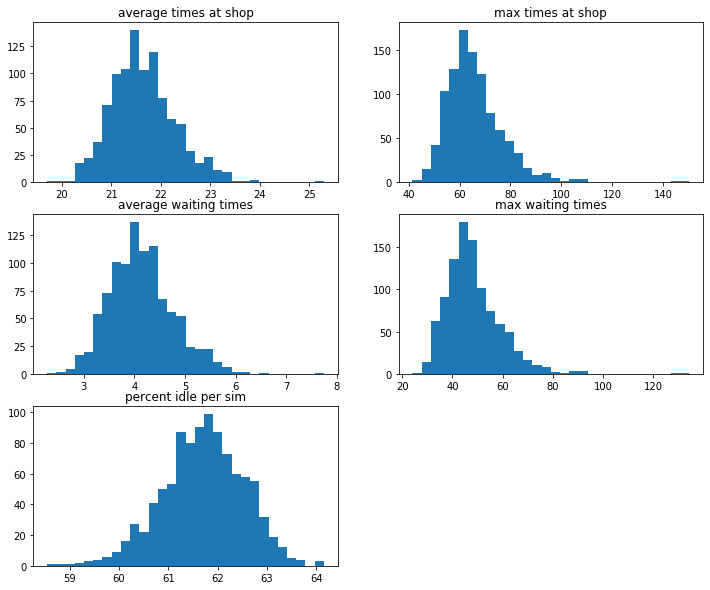

In [9]:
# Parameter set 2:
n_sim = 1000
n_cars = 500
min_arrival_t = 1 
max_arrival_t = 60 
min_proc_t = 15
max_proc_t = 20
stats1 = run_multiple_simulations(n_sim, n_cars, min_arrival_t, max_arrival_t, min_proc_t, max_proc_t)
plot_stats(stats1, 'Set 2 -- arrival times 1 - 60 min; processing times: 15 - 20 min')

We can see that a reduction of processing time of 0-15 min significantly reduces the average and maximum times the cars spend at the tire replacement shop. The average time at the shop now decreased from around 30-50 min to 20-24 min. Also the maximum waiting time is in most simulations never longer than 10 min. However, with this set of parameters, the percent of idle time increased from around 40-55 min to around 58-64 min. 

With a third set of parameters, let's investigate how the distributions change if we assume that the cars arrival time becomes more frequent and more stable. We change the arrival times from 1-60 min to 5-30 min, while keeping all other parameters the same.

Results 1000 runs: Set 3 -- arrival times 5 - 30 min; processing times: 15 - 20 min


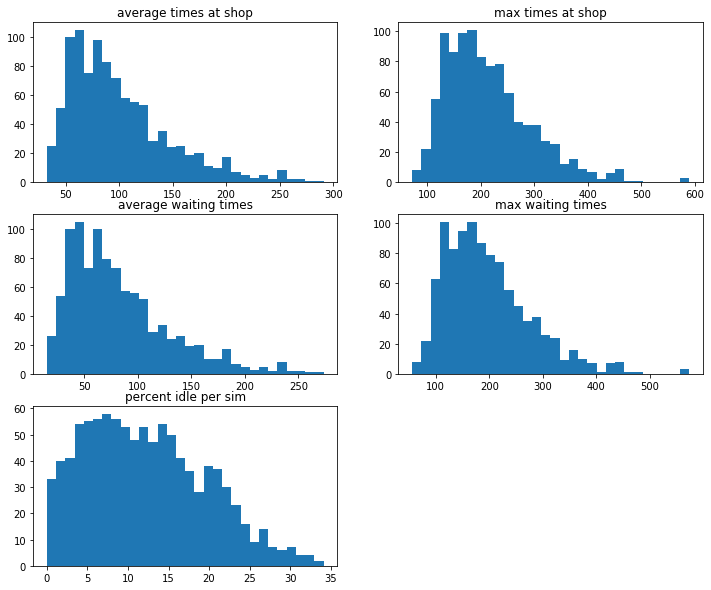

In [10]:
# Parameter set 3:
n_sim = 1000
n_cars = 500
min_arrival_t = 5
max_arrival_t = 30
min_proc_t = 15
max_proc_t = 20
stats1 = run_multiple_simulations(n_sim, n_cars, min_arrival_t, max_arrival_t, min_proc_t, max_proc_t)
plot_stats(stats1, 'Set 3 -- arrival times 5 - 30 min; processing times: 15 - 20 min')

As the results above show, cutting the arrival times in half increases the average wating time from around 3-6 min to around 30-200 min. The idle percentage decreased significantly and is now 0% in many cases.

Another thing that stands out is the wide range of the distributions. This means that for a simulation with 500 cars it is very uncertain how long average and maximum waiting and processing times are. The range of reasonable to be expected average waiting times for example is between around 30 and 250 min. Let's see if we get more stable expected statistics if we increase the number of cars in the simulation from 500 to 2500 and use again the parameters from parameter set 2.

Results 1000 runs: Set 4 -- 2500 cars, arrival times 5 - 30 min; processing times: 15 - 20 min


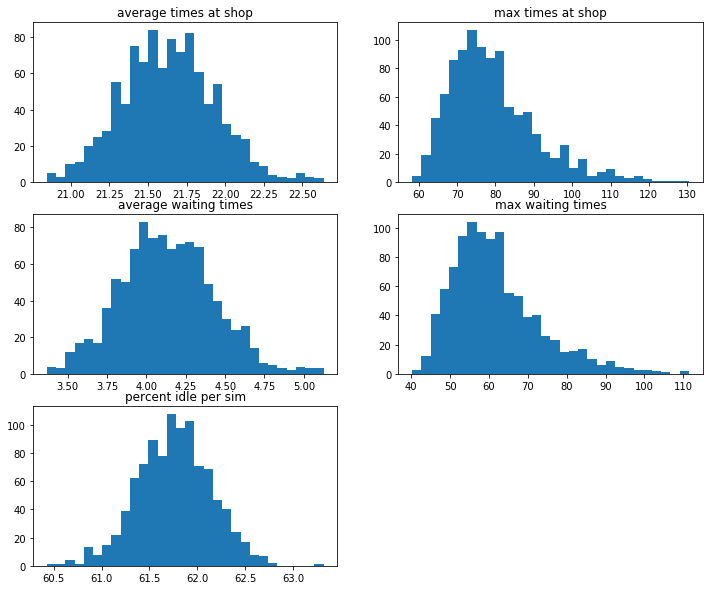

In [11]:
# Parameter set 4:
n_sim = 1000
n_cars = 2500
min_arrival_t = 1 
max_arrival_t = 60 
min_proc_t = 15
max_proc_t = 20
stats1 = run_multiple_simulations(n_sim, n_cars, min_arrival_t, max_arrival_t, min_proc_t, max_proc_t)
plot_stats(stats1, 'Set 4 -- 2500 cars, arrival times 5 - 30 min; processing times: 15 - 20 min')

The results above show the expected effect. Compared to parameter set 2, the average waiting times are mostly in the range between 21 - 22.5 min (with 2500 cars in the simulation) compared to around 20-23.5 min (with 500 cars). A similar narrowing occurred for the other statistics as well.

#### CONCLUSION

The simulations above show that the statistics regarding waiting times for cars and idle percentage are extremely sensitive to changes in the arrival times and processing times. Also, the uncertainty in arrival times has a strong impact on the statistics, which becomes evident by the wide distribution of the statistics over many simulation runs with the same parameters. In reality this means that a tire replacement shop should have a very good model of the arrival times of its customers, to not increase waiting times to the level where customers might be unsatisfied and switch to a competitor and to not have to much idle time (unpaid working time). To counter such issues the tire shop should try to schedule appointments ahead of time whenever possible. 